# Load Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
df = pd.read_csv("../data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Exploratory Data Analysis

## Initial Data Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
cat_cols = df.select_dtypes("object").columns.to_list()
print(cat_cols)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [7]:
for col in cat_cols:
  print(f"{col}: {df[col].unique()}")

Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
print(df.duplicated().sum())

0


## Categorical Data

In [10]:
# Create function for creating count plot

def count_plot(df, col):
    plt.figure(figsize=(5, 5))
    ax = sns.countplot(data=df, x=col, color='skyblue')

    # Get total count for percentage calculation
    total = len(df)

    # Annotate each bar with count and percentage
    for p in ax.patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y + 10, f'{count} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=10)

    # Increase y-axis limit for more space above bars
    max_height = max([p.get_height() for p in ax.patches])
    ax.set_ylim(0, max_height * 1.15)

    # Improve aesthetics
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

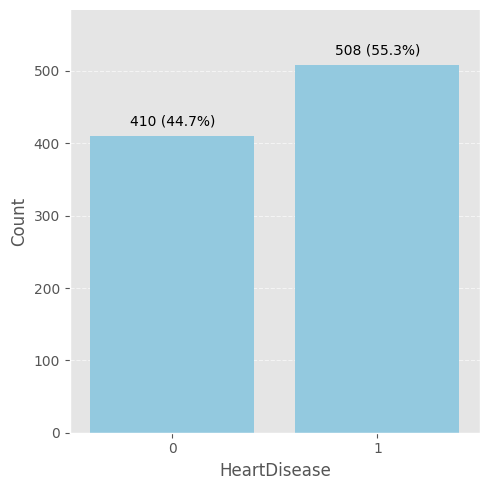

In [11]:
count_plot(df, "HeartDisease")

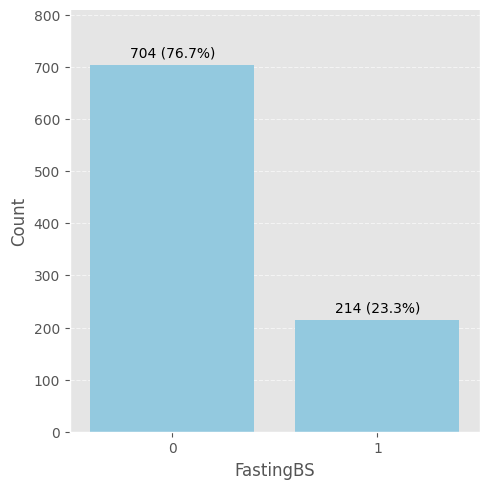

HeartDisease,0,1
FastingBS,,
0,0.519886,0.480114
1,0.205607,0.794393


In [12]:
count_plot(df, "FastingBS")
pd.crosstab(df["FastingBS"], df['HeartDisease'], normalize='index')

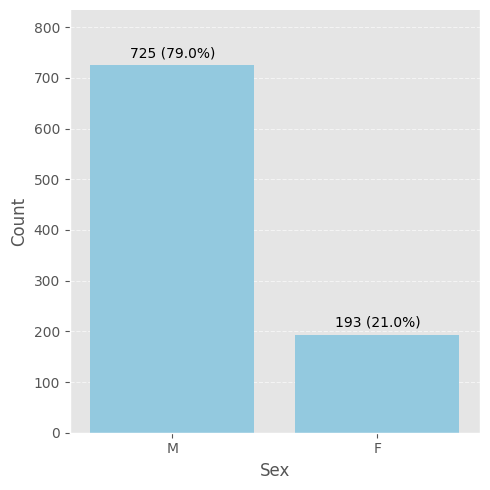

HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


In [13]:
count_plot(df, "Sex")
pd.crosstab(df["Sex"], df['HeartDisease'], normalize='index')

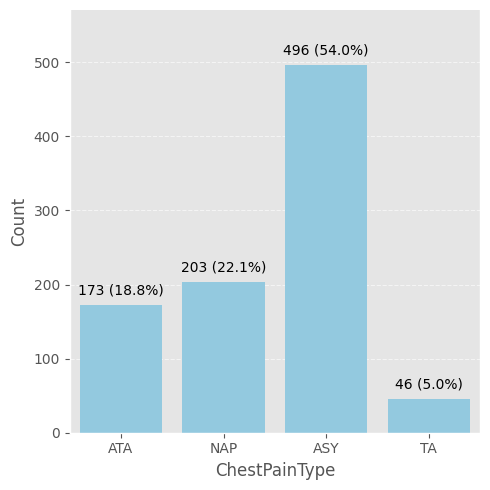

HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


In [14]:
count_plot(df, "ChestPainType")
pd.crosstab(df["ChestPainType"], df['HeartDisease'], normalize='index')

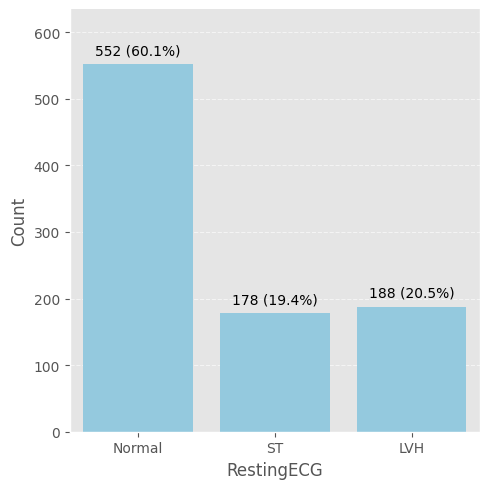

HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


In [14]:
count_plot(df, "RestingECG")
pd.crosstab(df["RestingECG"], df['HeartDisease'], normalize='index')

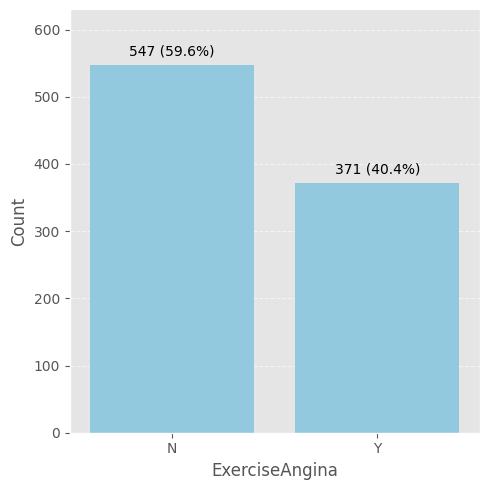

HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


In [15]:
count_plot(df, "ExerciseAngina")
pd.crosstab(df["ExerciseAngina"], df['HeartDisease'], normalize='index')

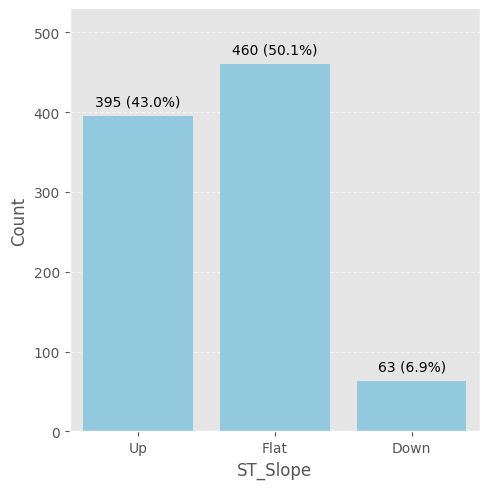

HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


In [16]:
count_plot(df, "ST_Slope")
pd.crosstab(df["ST_Slope"], df['HeartDisease'], normalize='index')

## Numerical Data

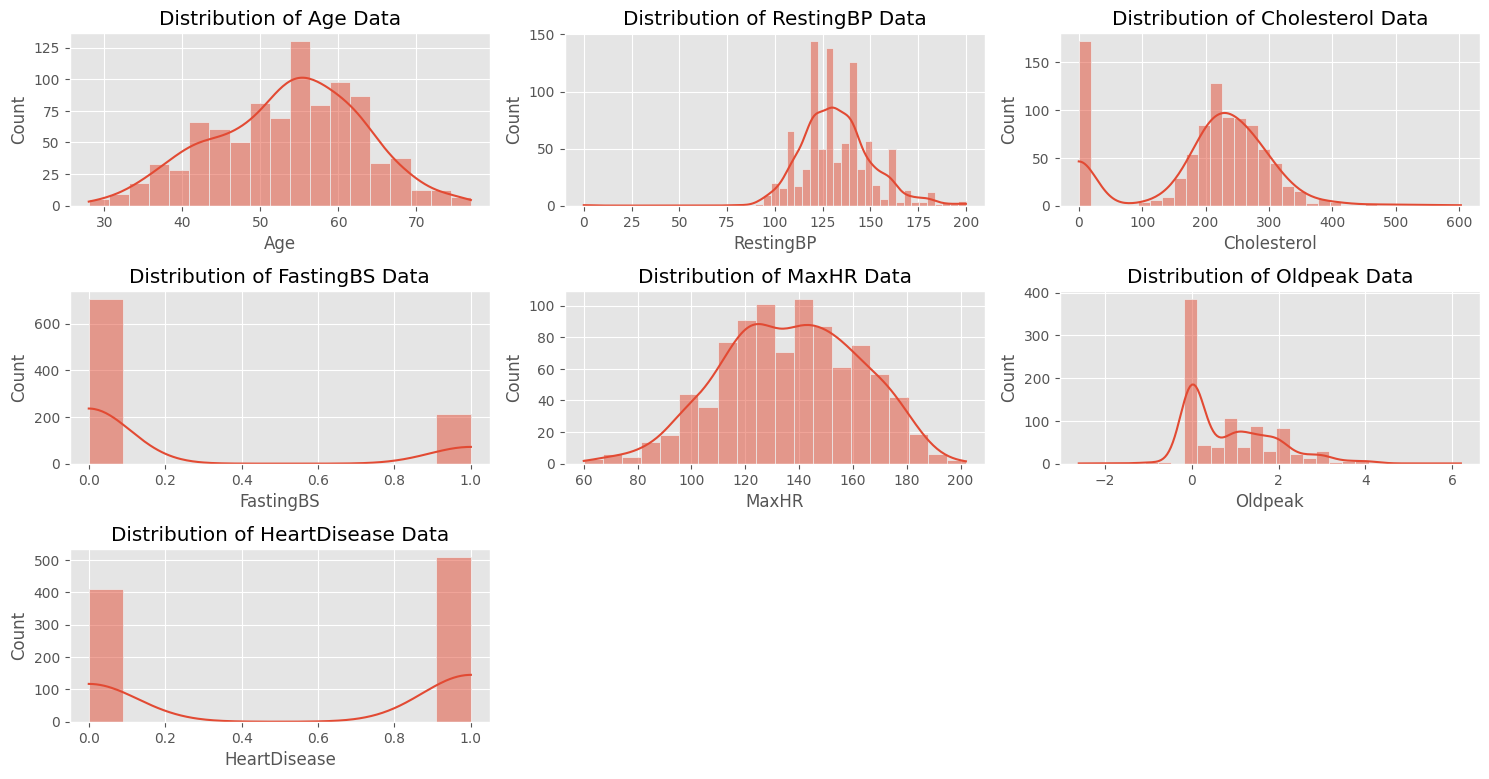

In [17]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df[num_cols].columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

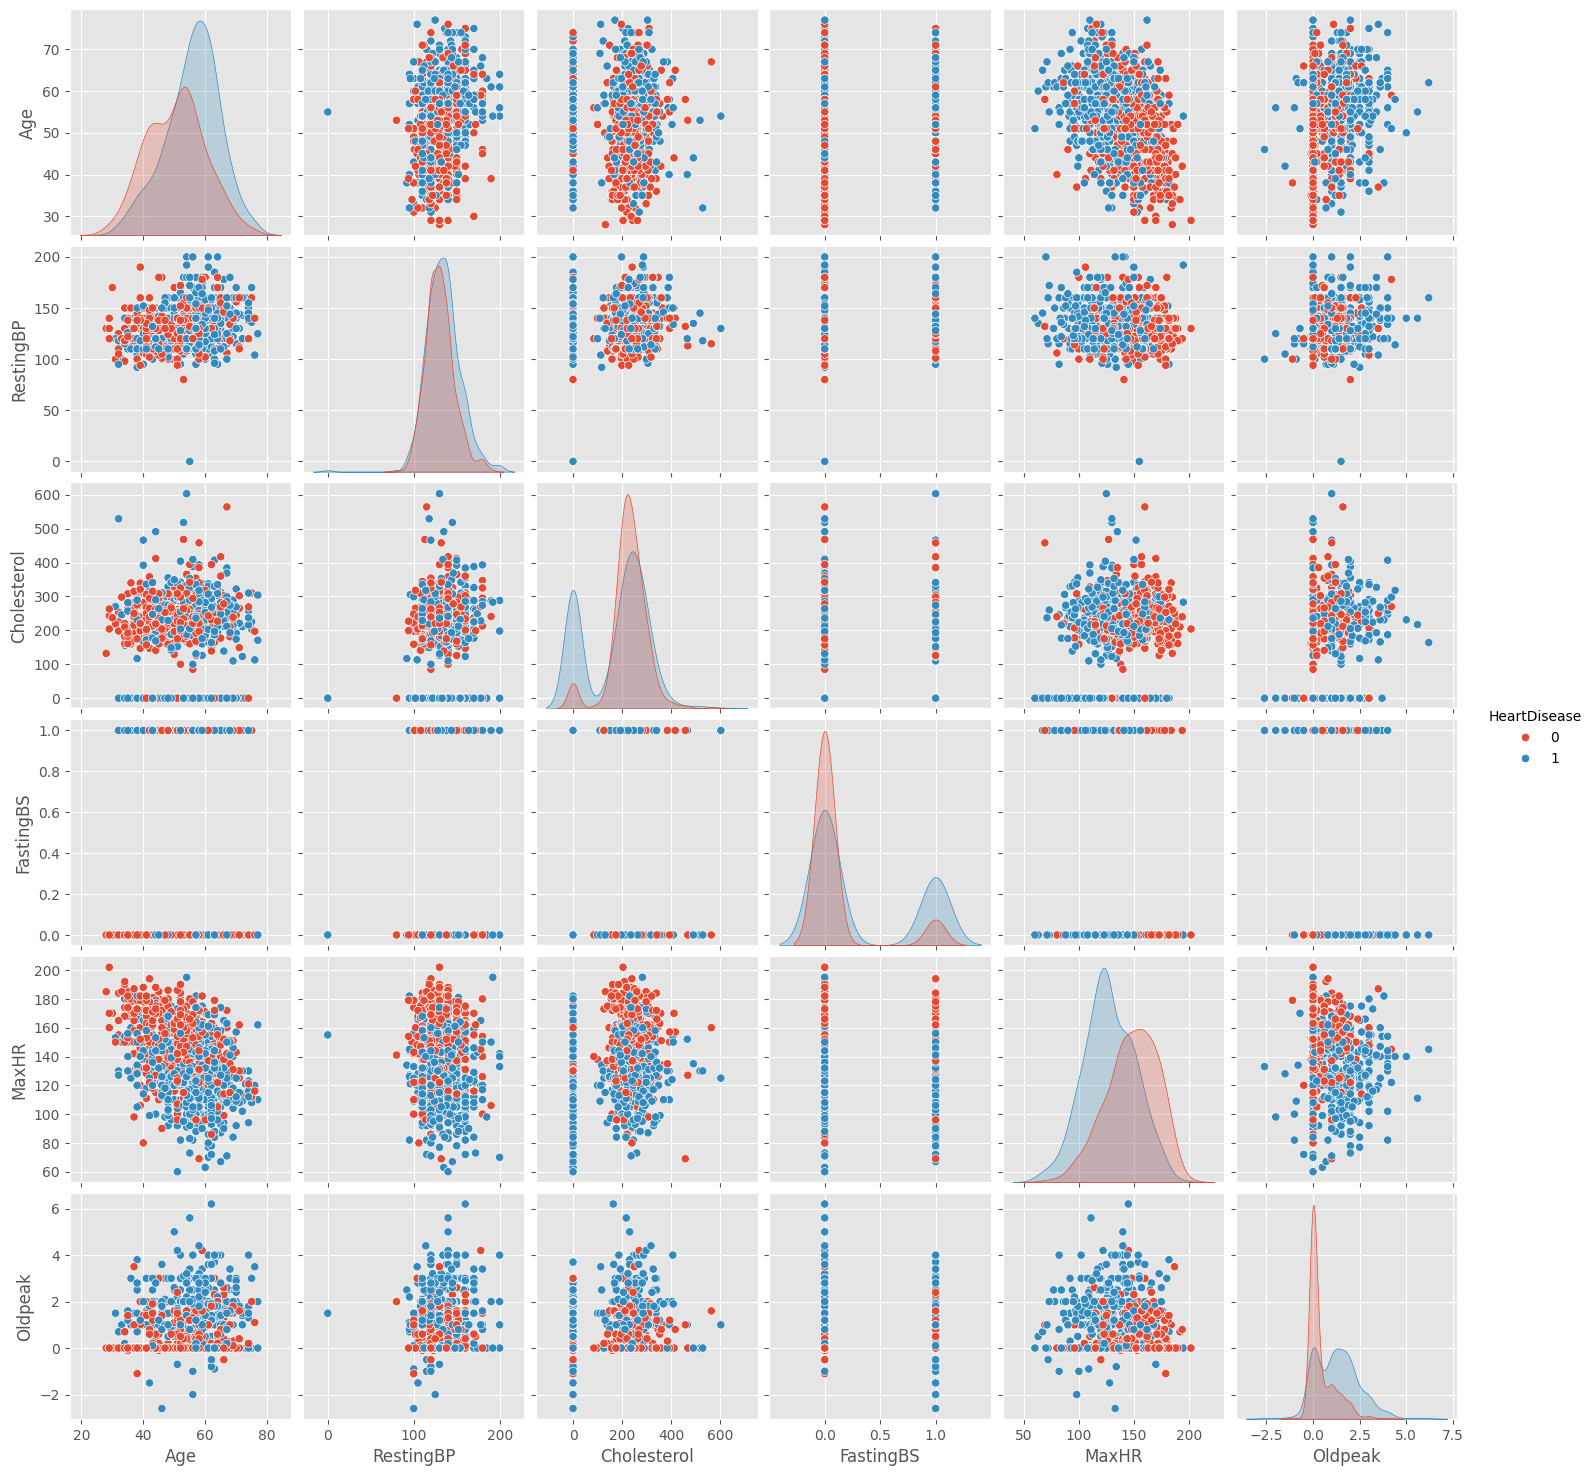

In [18]:
sns.pairplot(df[num_cols], hue='HeartDisease')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

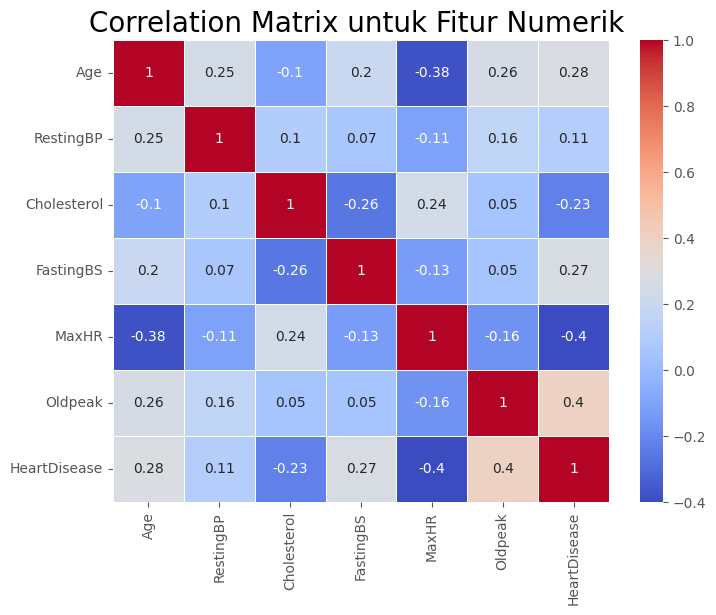

In [19]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[num_cols].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Outlier

In [20]:
print(cat_cols)
print(num_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [21]:
# function to show IQR value and show boxplot
def iqr_boxplot(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Lower Bound of {col}: {lower_bound}")
    print(f"Upper Bound of {col}: {upper_bound}")

    fig, axes = plt.subplots(2, 1, figsize=(6, 8))  # 2 rows, 1 column

    # Top plot
    sns.boxplot(data=df, x=col, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')

    # Bottom plot
    sns.boxplot(data=df, x='HeartDisease', y=col, ax=axes[1])
    axes[1].set_title(f'{col} Distribution by Heart Disease')

    plt.tight_layout()
    plt.show()

Lower Bound of Age: 27.5
Upper Bound of Age: 79.5


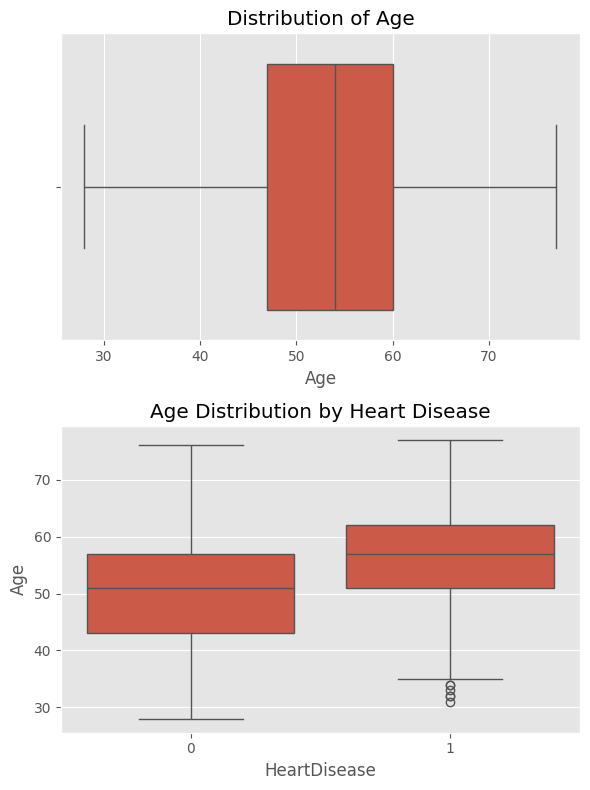

In [22]:
iqr_boxplot(df, 'Age')

Lower Bound of RestingBP: 90.0
Upper Bound of RestingBP: 170.0


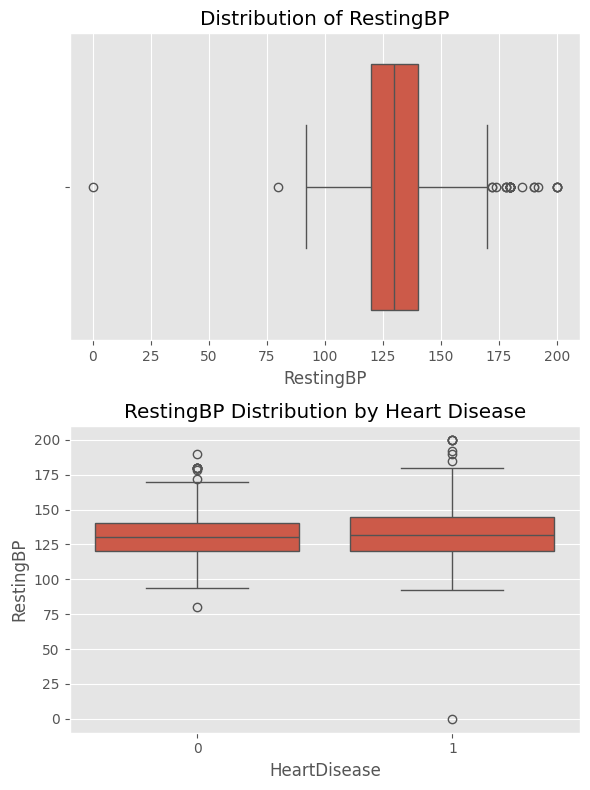

In [23]:
iqr_boxplot(df, 'RestingBP')

Lower Bound of Cholesterol: 32.625
Upper Bound of Cholesterol: 407.625


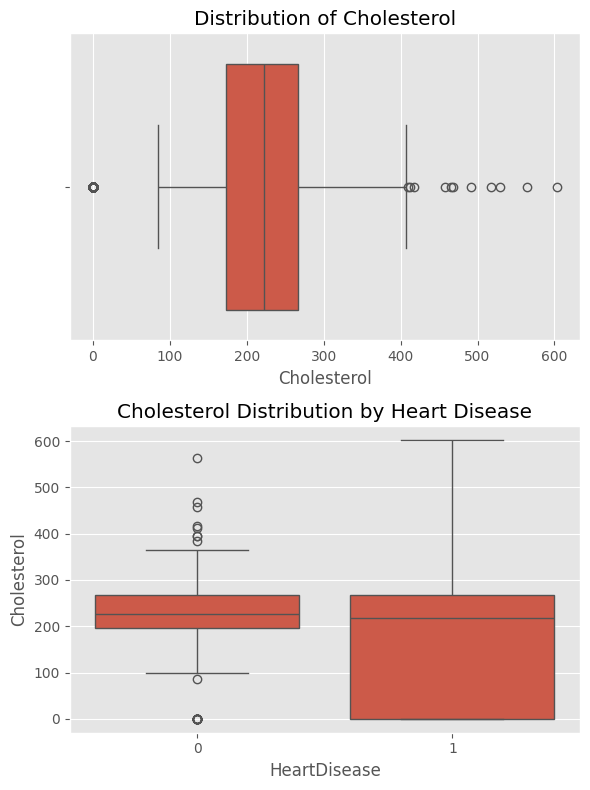

In [24]:
iqr_boxplot(df, 'Cholesterol')

Lower Bound of MaxHR: 66.0
Upper Bound of MaxHR: 210.0


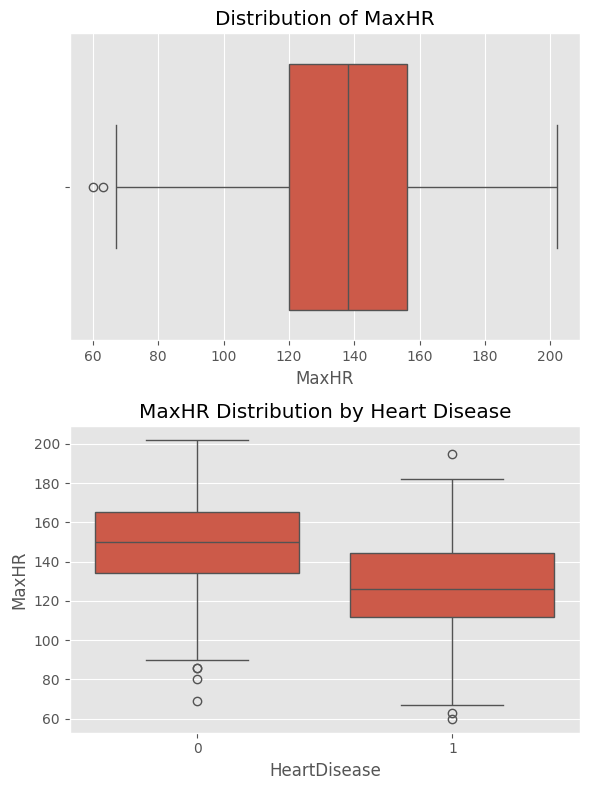

In [25]:
iqr_boxplot(df, 'MaxHR')

Lower Bound of Oldpeak: -2.25
Upper Bound of Oldpeak: 3.75


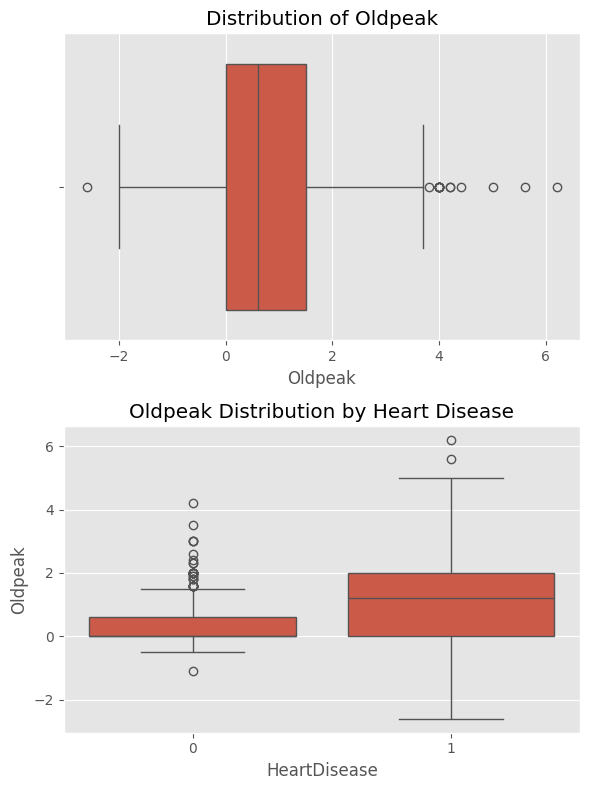

In [26]:
iqr_boxplot(df, 'Oldpeak')